<h1 align="center"><font size="7">Supervised ML: Classification Project by Nikhil</font></h1>


In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.inspection import permutation_importance
# , plot_partial_dependence

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Dataset obtained from kaggle: **Bank Customer Churn**

In [375]:
df = pd.read_csv('Customer-Churn-Records.csv')

## About the Data

In [376]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

The "Bank Customer Churn" Dataset contains 18 features and 10000 records. Since only one dataset is given, we can use this data for training and testing the model. Let's explore through the features of the Dataset.


    RowNumber—corresponds to the record (row) number and has no effect on the output.
    CustomerId—contains random values and has no effect on customer leaving the bank.
    Surname—the surname of a customer has no impact on their decision to leave the bank.
    CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
    Geography—a customer’s location can affect their decision to leave the bank.
    Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
    Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
    Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
    Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
    NumOfProducts—refers to the number of products that a customer has purchased through the bank.
    HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
    IsActiveMember—active customers are less likely to leave the bank.
    EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
    Exited—whether or not the customer left the bank.
    Complain—customer has complaint or not.
    Satisfaction Score—Score provided by the customer for their complaint resolution.
    Card Type—type of card hold by the customer.
    Points Earned—the points earned by the customer for using credit card.

# Objectives

- 1) Studying the features of the data sample - Data preprocessing for Classification analysis
- 2) Prediction using (a) Logistic Regression, (b) K Nearest Neighbours, (c) Decision Trees, (d) Random Forest, (e) Stacking models
- 3) Feature Importance
- 4) Conclusion

# 1) Exploratory Data Analysis

In [378]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [379]:
df.shape

(10000, 18)

In [380]:
df.duplicated().sum()

0

In [381]:
df = df.drop_duplicates()

In [382]:
df.duplicated().sum()

0

In [383]:
for column in df.columns:
    print(column,(df[column]=='Missing').sum())

RowNumber 0
CustomerId 0
Surname 0
CreditScore 0
Geography 0
Gender 0
Age 0
Tenure 0
Balance 0
NumOfProducts 0
HasCrCard 0
IsActiveMember 0
EstimatedSalary 0
Exited 0
Complain 0
Satisfaction Score 0
Card Type 0
Point Earned 0


In [384]:
#To print the categorical columns from the dataset 

category_columns=list(df.select_dtypes(include=['object']).columns)
print(category_columns)
print("\nNo. of Category Columns : ",len(category_columns))


['Surname', 'Geography', 'Gender', 'Card Type']

No. of Category Columns :  4


## Categorical Variables

<Axes: xlabel='Card Type', ylabel='count'>

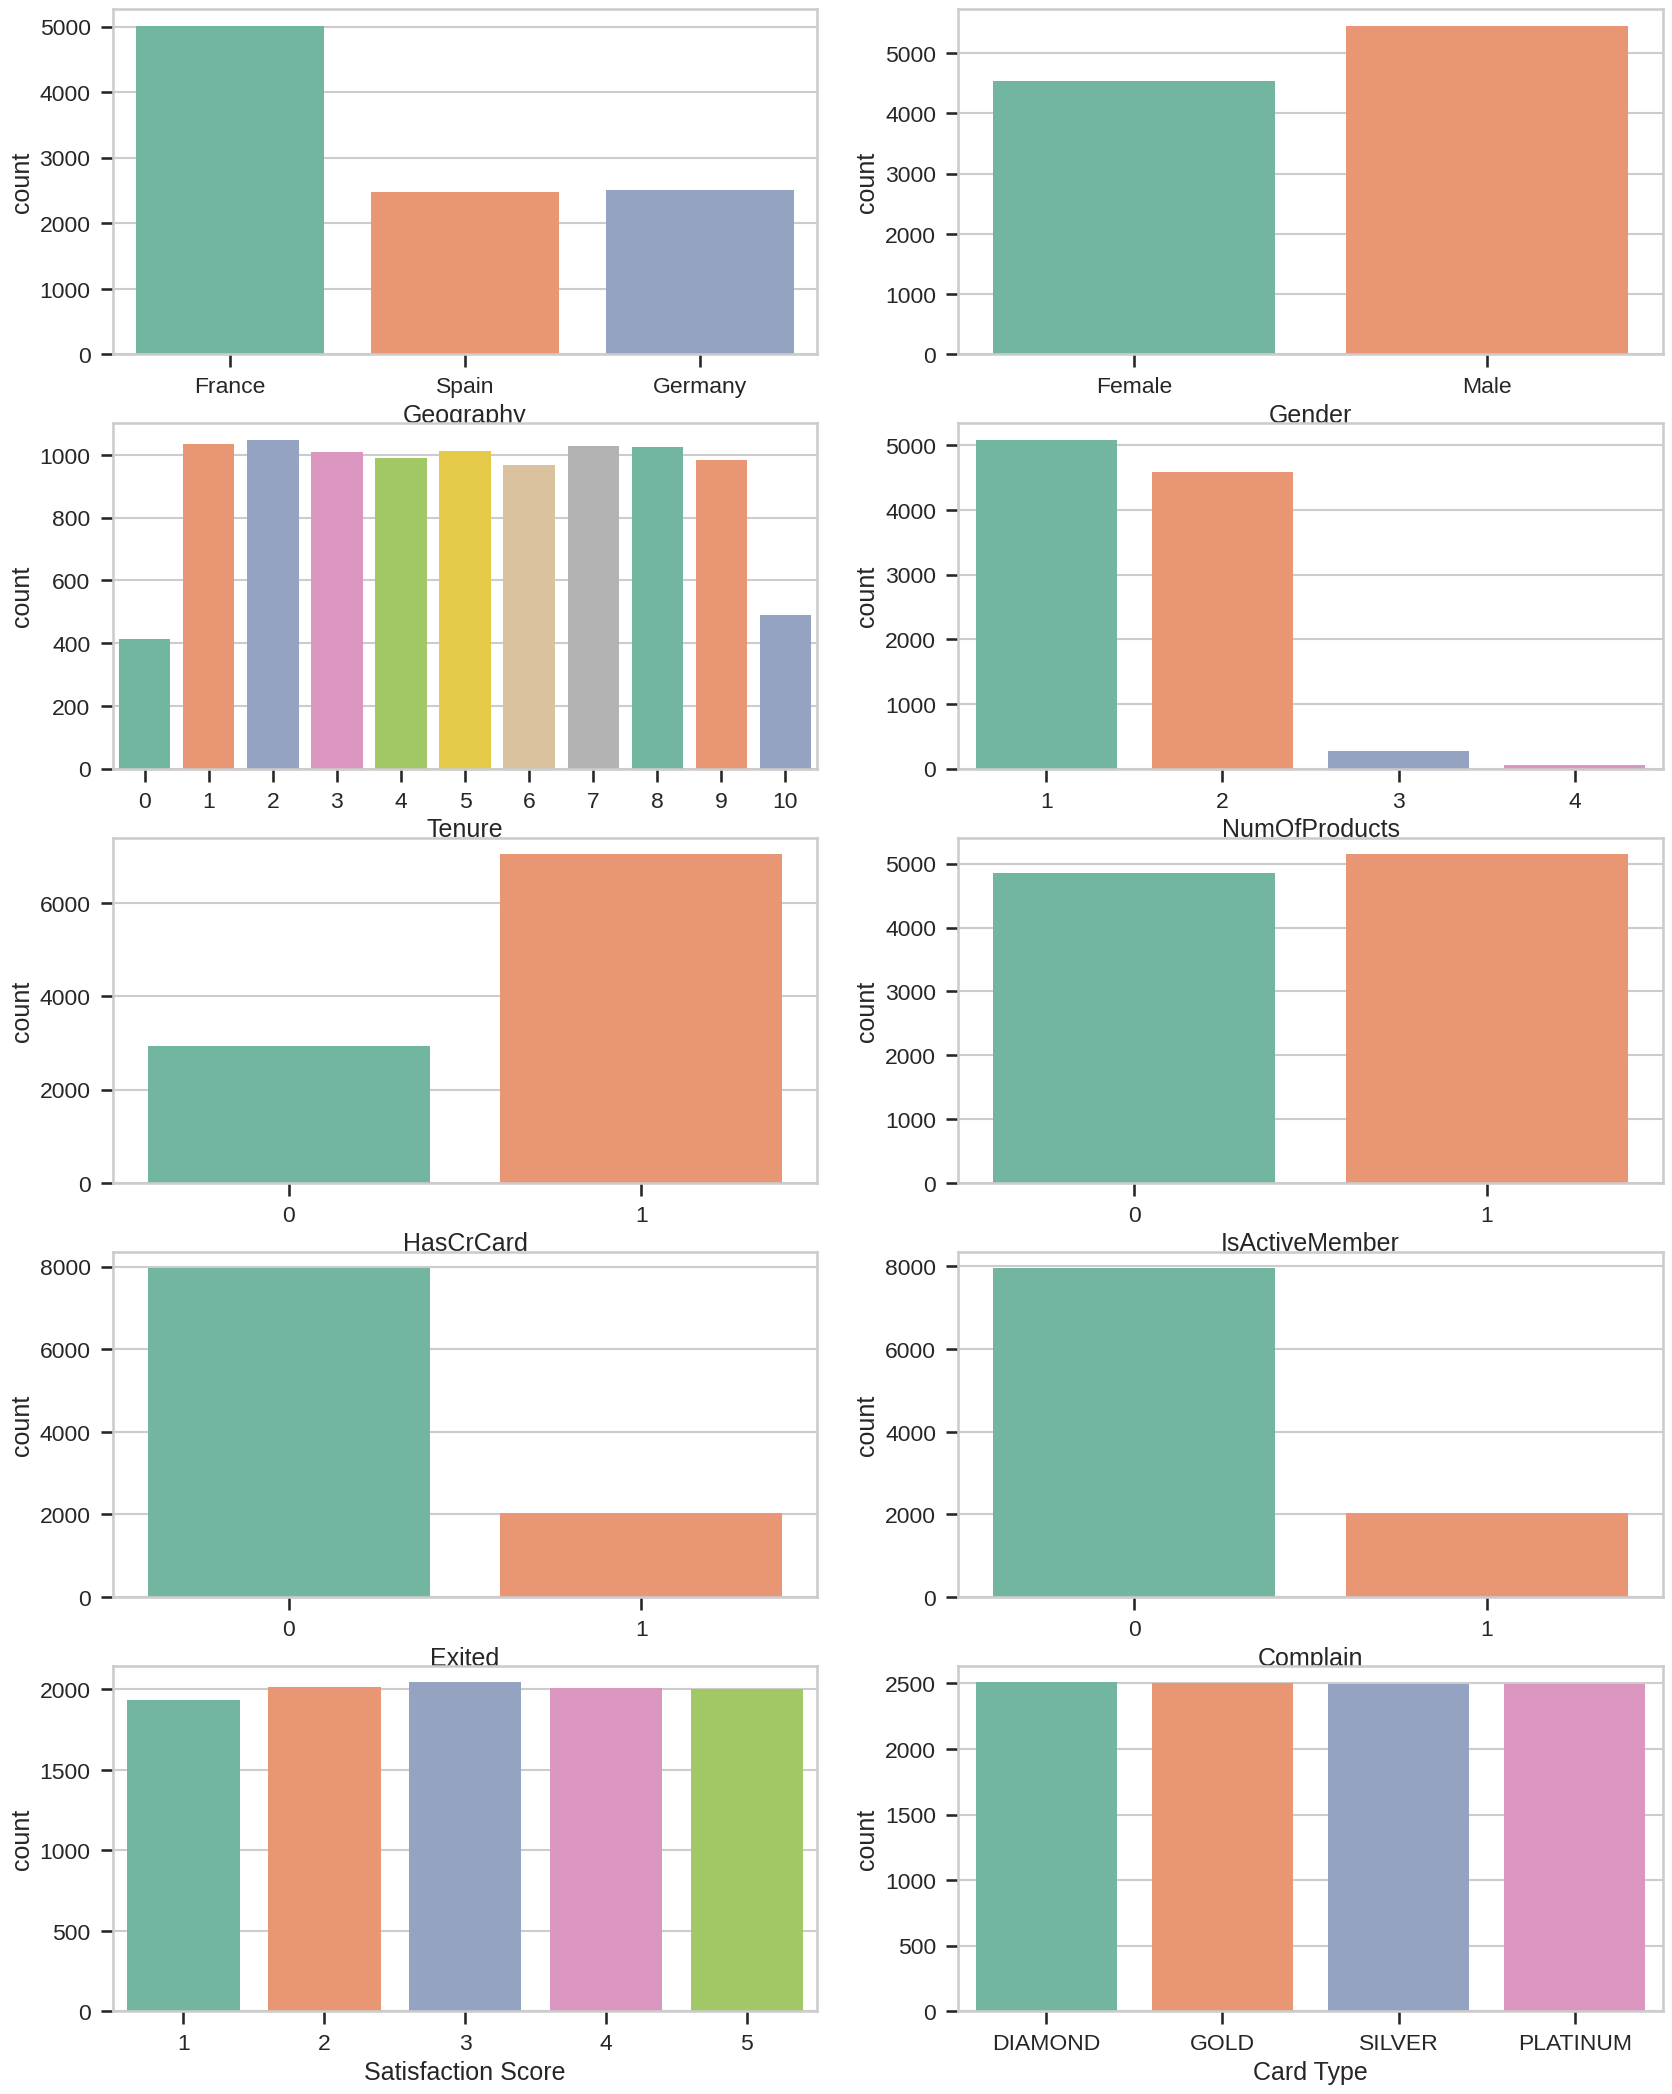

In [389]:
plt.figure(figsize = (20, 26))

plt.subplot(5, 2, 1)
# # plt.gca().set_title('Variable Geography', size=10)
sns.countplot(x = 'Geography', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
# plt.gca().set_title('Variable Gender', size=10)
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
# plt.gca().set_title('Variable Tenure', size=10)
sns.countplot(x = 'Tenure', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
# plt.gca().set_title('Variable NumOfProducts', size=10)
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
# plt.gca().set_title('Variable HasCrCard', size=10)
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
# plt.gca().set_title('Variable IsActiveMember', size=10)
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
# plt.gca().set_title('Variable Exited', size=10)
sns.countplot(x = 'Exited', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
# plt.gca().set_title('Variable Complain', size=10)
sns.countplot(x = 'Complain', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
# plt.gca().set_title('Variable Satisfaction Score', size=10)
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
# plt.gca().set_title('Variable Card Type', size=10)
sns.countplot(x = 'Card Type', palette = 'Set2', data = df)

## Continous variables

<Axes: xlabel='Point Earned', ylabel='Count'>

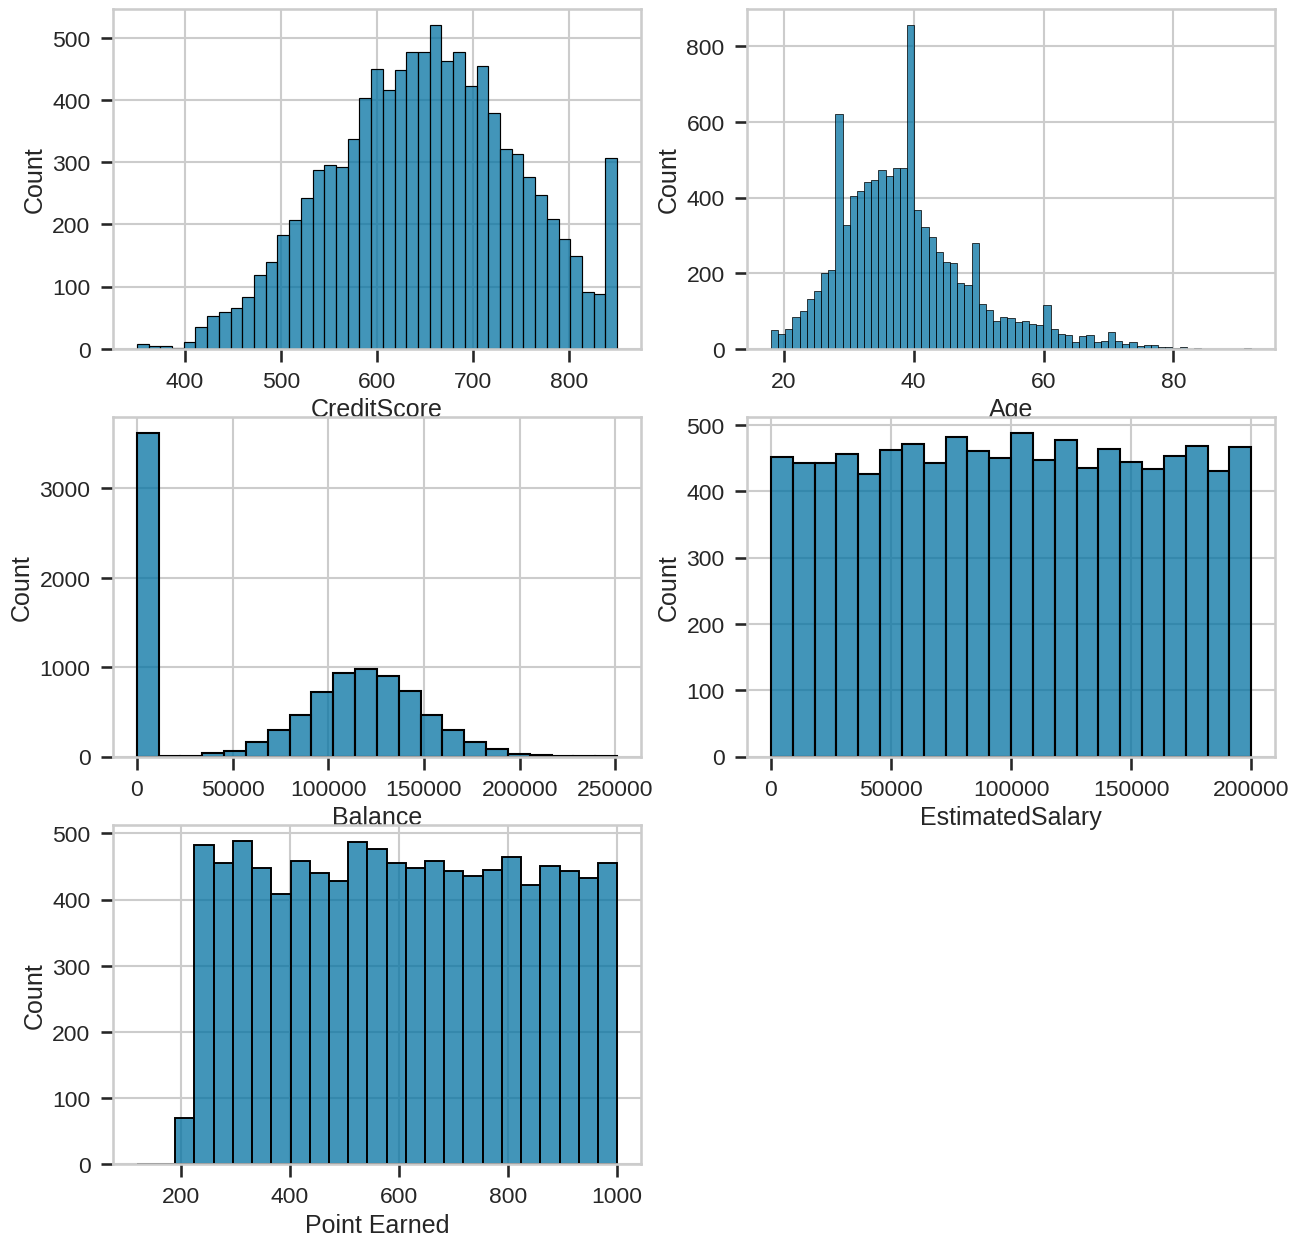

In [390]:
plt.figure(figsize = (15, 15))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'], kde = False)

## Bi-variate Analysis

<Axes: xlabel='Card Type', ylabel='count'>

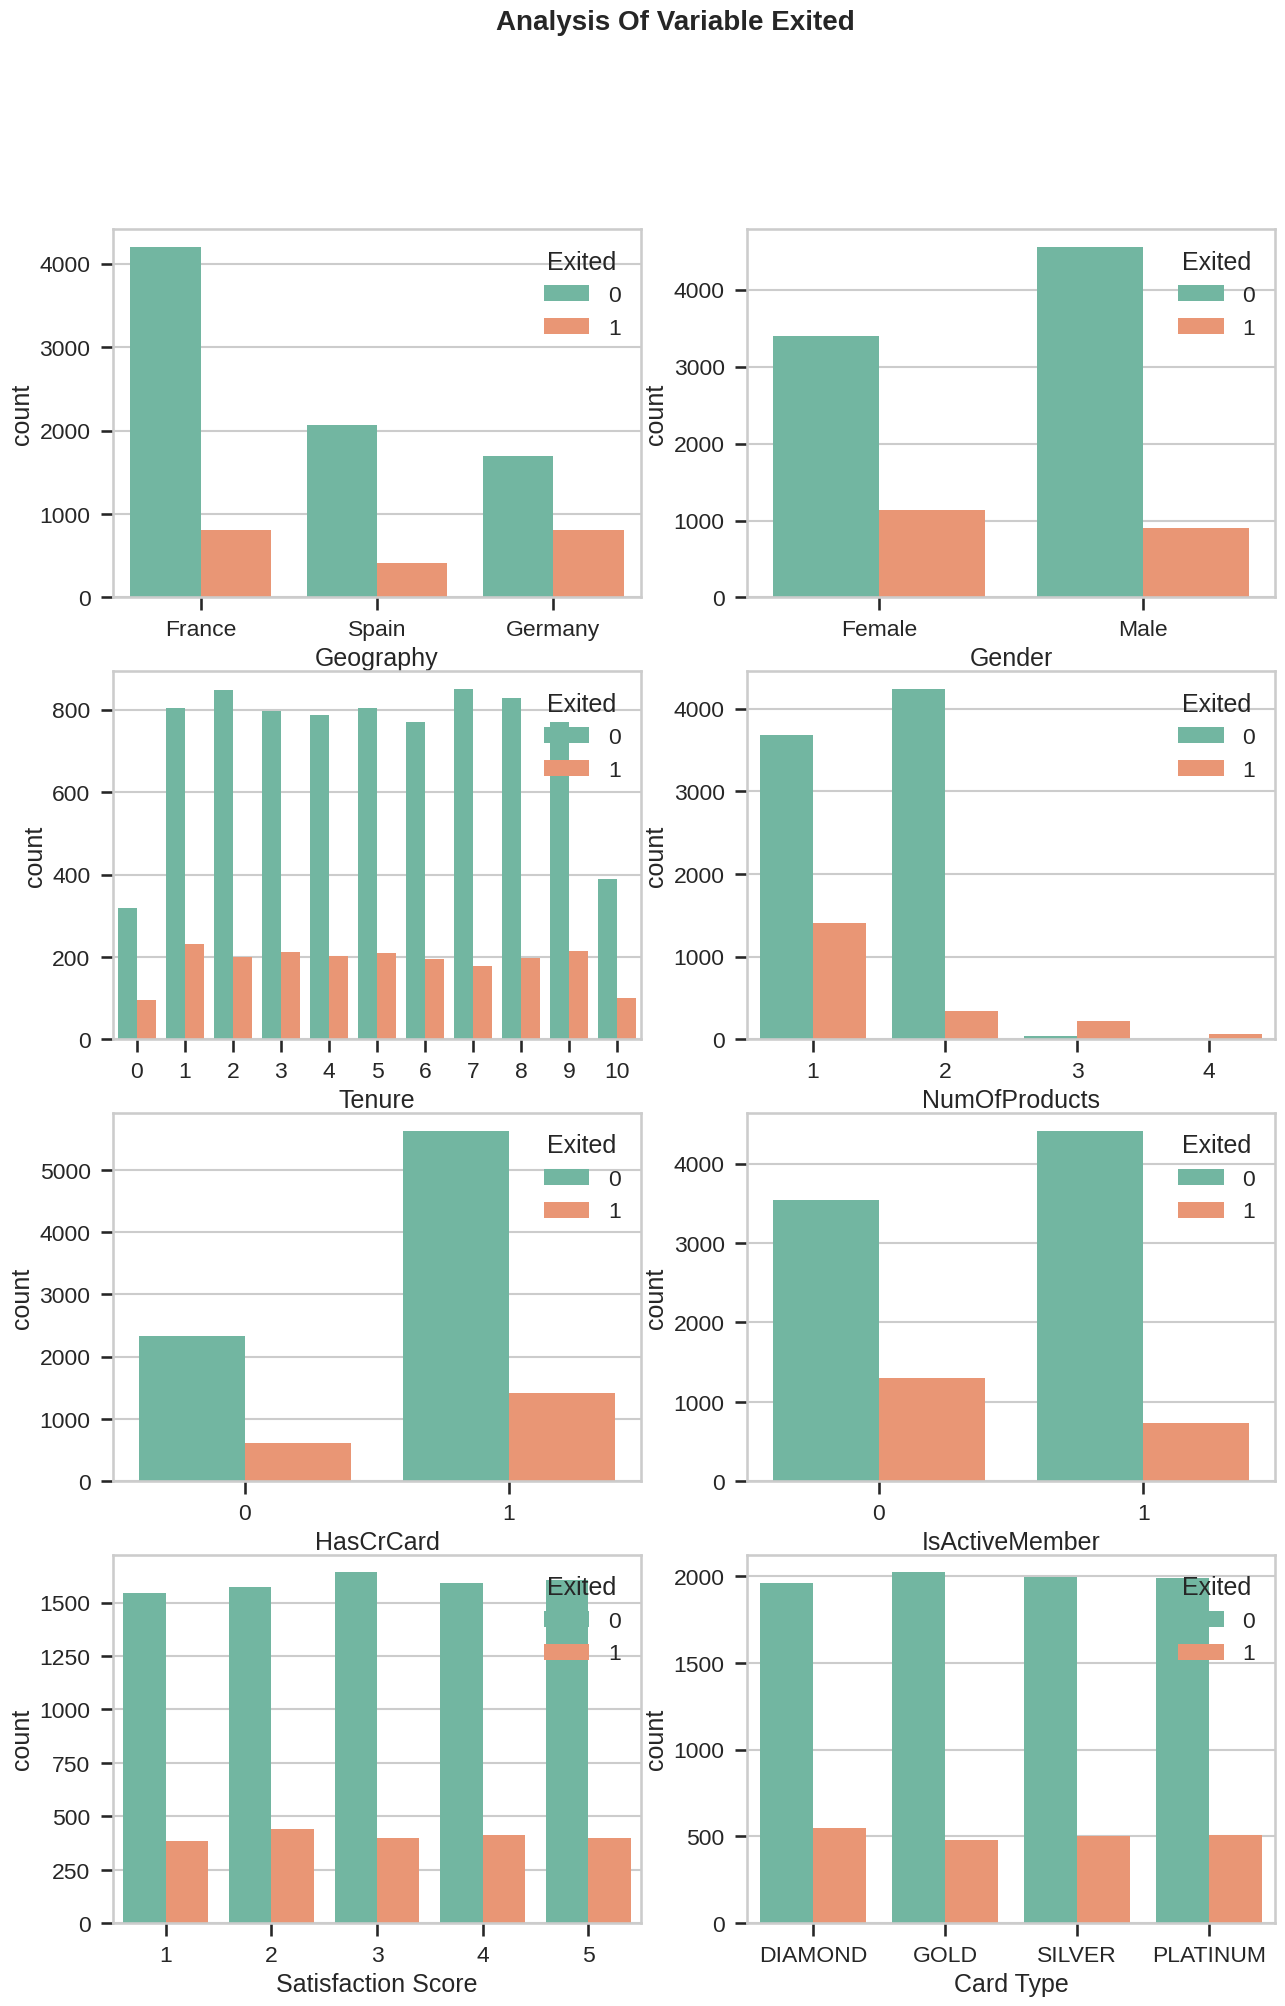

In [391]:
plt.figure(figsize = (15, 22))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
# plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
# plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
# plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
# plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
# plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
# plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
# plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
# plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

<Axes: xlabel='Exited', ylabel='Point Earned'>

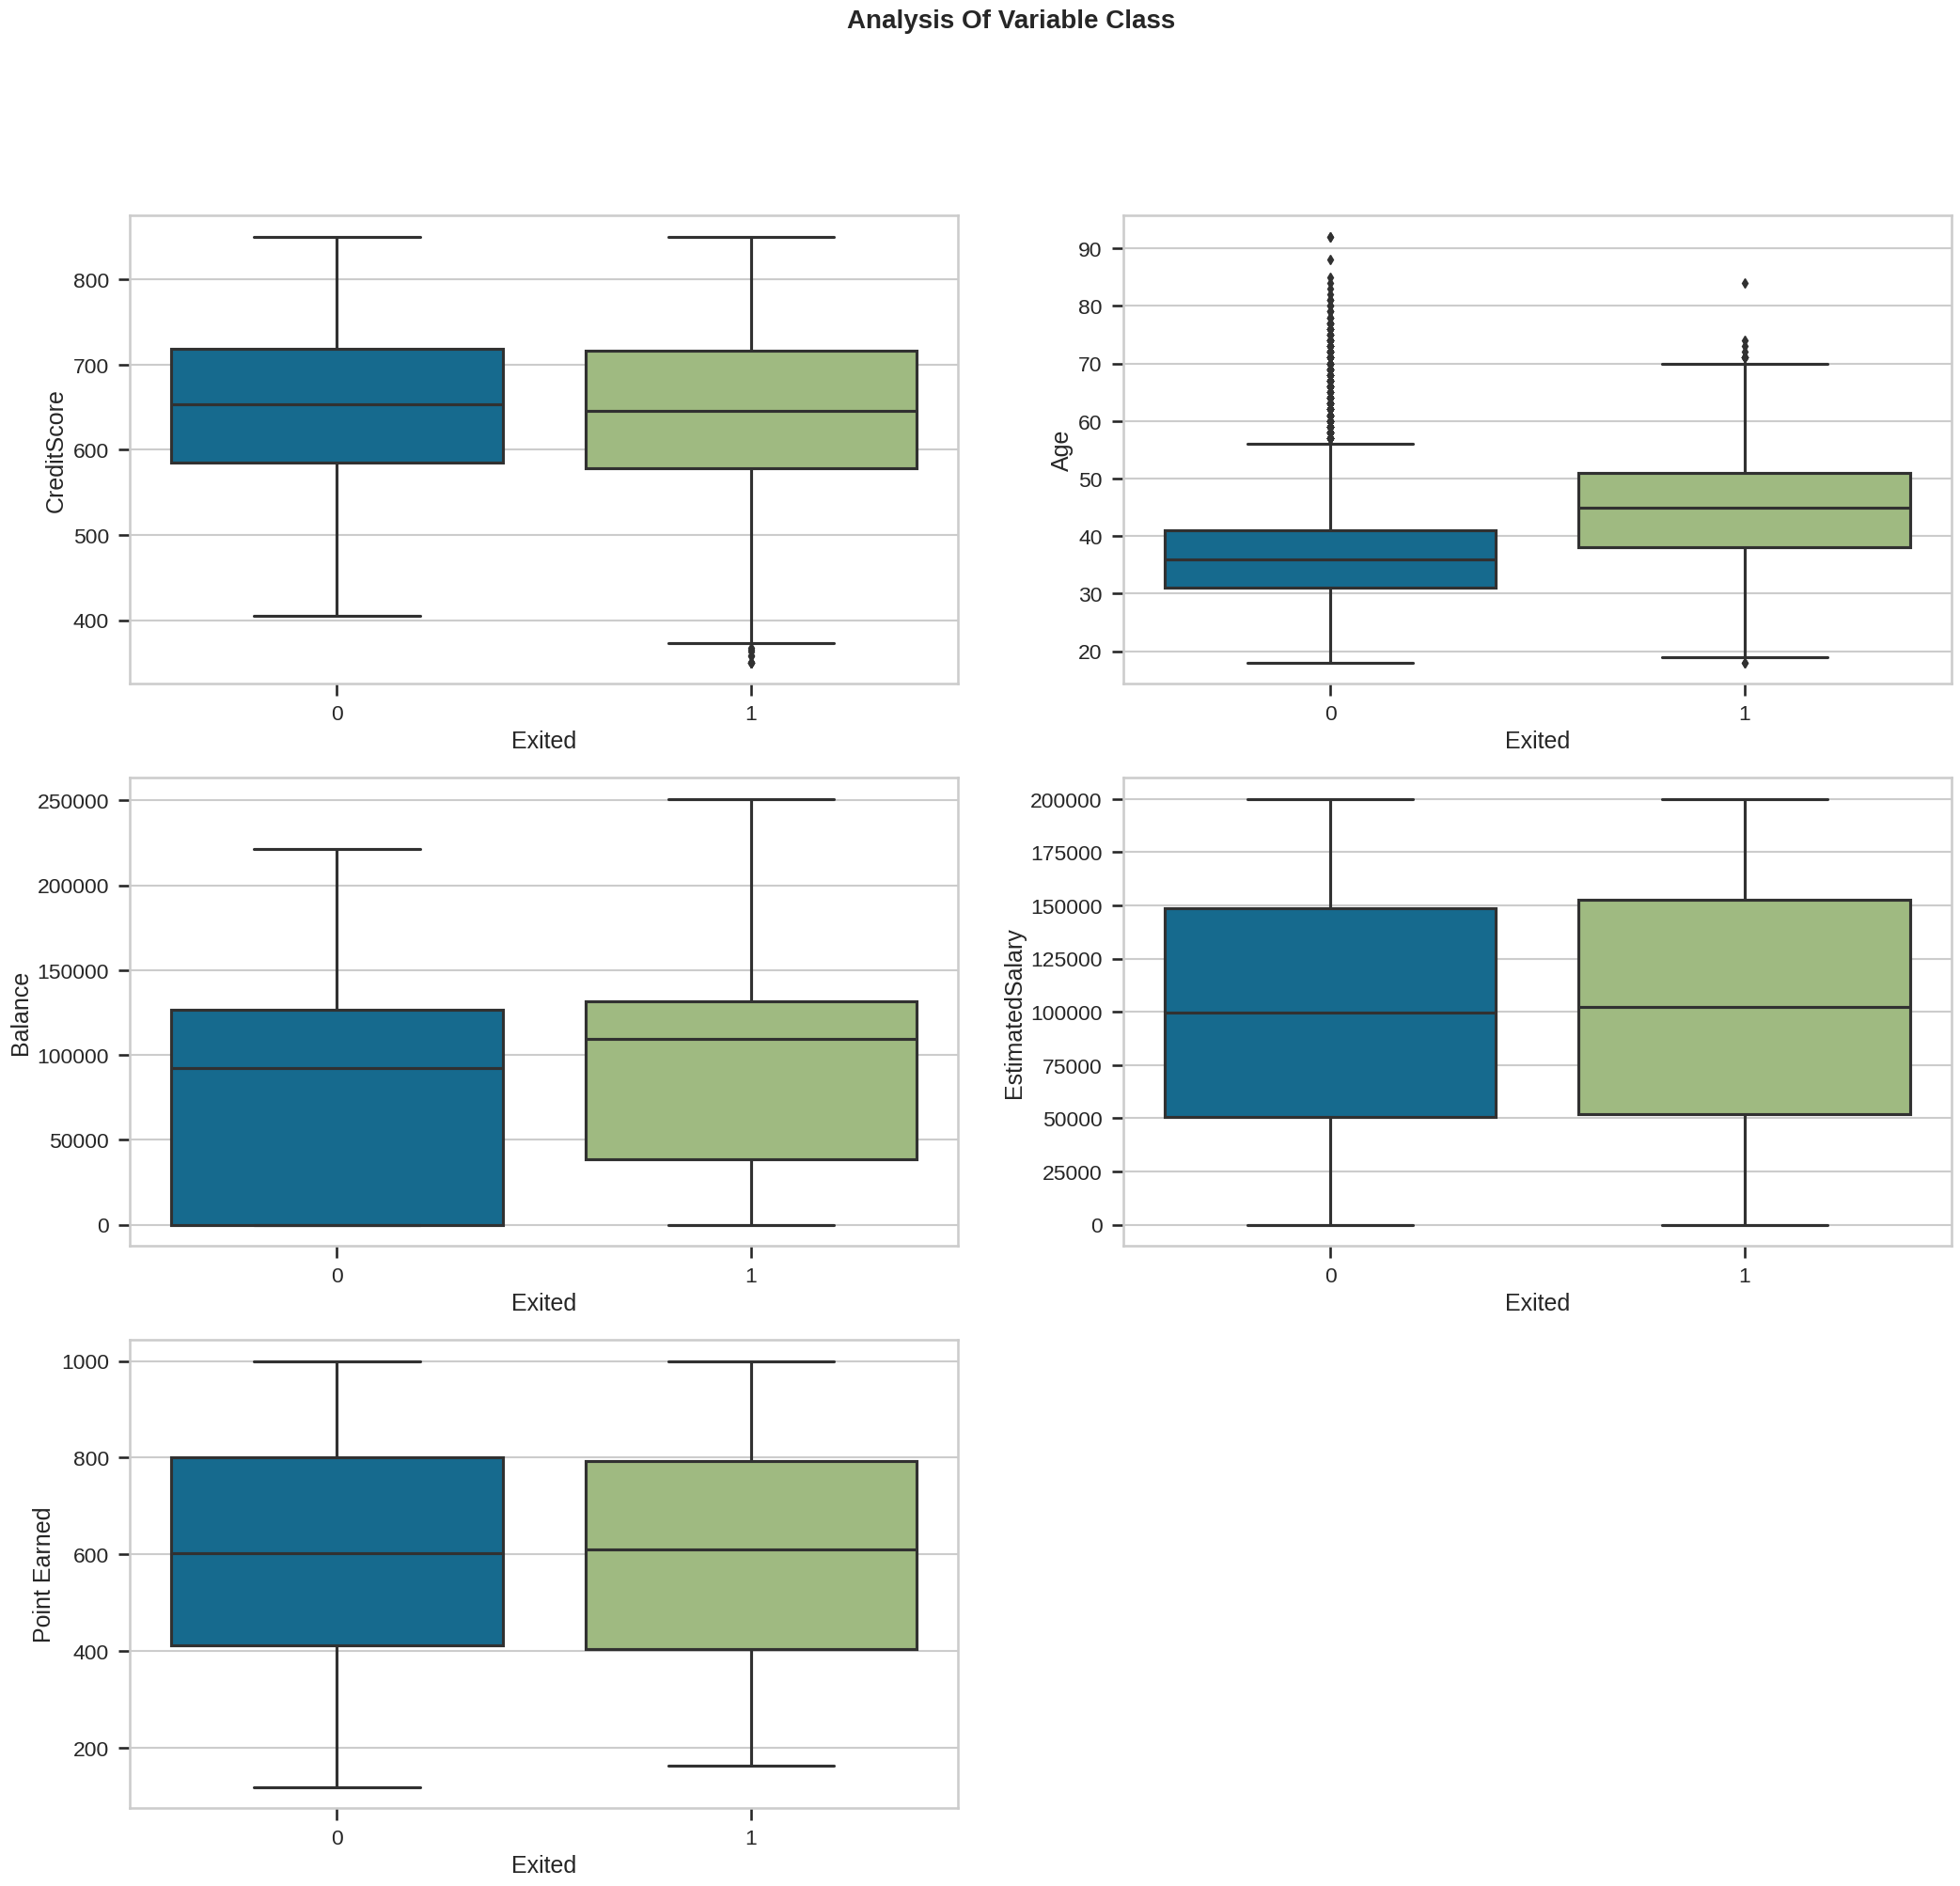

In [392]:
plt.figure(figsize = (25, 22))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

# 2. Model Building

Verifying the correlation between the variables

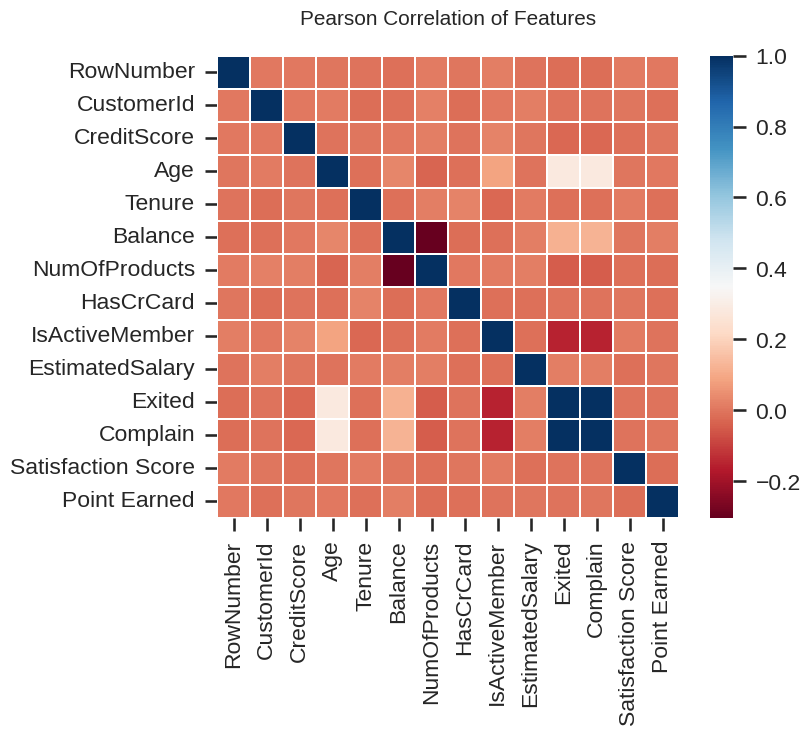

In [283]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

Looking at the correlation plot, we can see that we have 100% correlation between the target variables and the Complain variable, so let's eliminate the Complain variable.

In [284]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [285]:
df_mod = df.drop('Complain', axis = 1)

We will eliminate the RowNumber, CustomerID and Surname variables since they are not used in the model 

In [286]:
df_mod = df_mod.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

## OneHot Label Encoder

We are going to use the OneHotLabel Encoder to transform our categorical variables into continuous variables

In [287]:
hot = pd.get_dummies(df_mod[['Geography', 'Gender', 'Card Type']])
hot.columns.values

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype=object)

In [288]:
df_mod = pd.concat([df_mod, hot], axis = 1)
df_mod = df_mod.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

## Selecting Feature variables and Target variable 

In [289]:
X_col = df_mod.drop('Exited', axis = 1)
X = X_col.values
y = df_mod['Exited']

In [290]:
X_col

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,5,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,5,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,3,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,2,339,0,1,0,0,1,0,1,0,0


<Axes: >

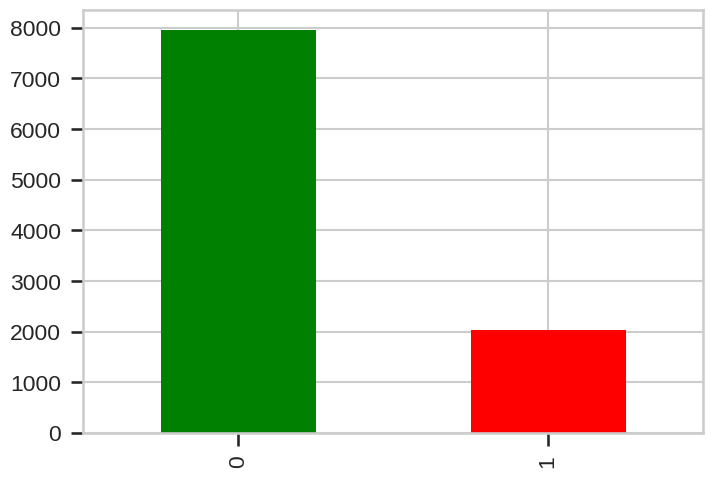

In [291]:
# Visualize classes
y.value_counts().plot.bar(color=['green', 'red'])

## StandardScaler

We will use StandardScaler to put our data in the same scale

In [292]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X_col)

## Transforming Data into Train and Test datasets, here we will use 30% of our data to test the ML models

In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

### Balancing Classes (Not implemented)

<!-- We have many values of a class and few values of others, we will balance the classes using OverSampling to make the classes balanced -->

In [362]:
# # !pip install imblearn
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_train, y_train = ros.fit_resample(X_train, y_train)

In [363]:
# # Visualize classes
# y_train.value_counts().plot.bar(color=['green', 'red'])

## Evaluation Metrics

In [364]:
def evaluate_metrics(yt, yp):
    metrics = list()
    accuracy = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    recall = recall
    precision = precision
    f1score = f_beta
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':f1score, 'accuracy':accuracy}))
    metrics = pd.concat(metrics, axis=1)
    
    return metrics

## 2. (a) Logistic Regression

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=1, cv=10, penalty='l1', solver='liblinear').fit(X_train, y_train)

# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=1, cv=10, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [366]:
y_pred_lr = lr.predict(X_test)
y_pred_l1 = lr_l1.predict(X_test)
y_pred_l2 = lr_l2.predict(X_test)

In [367]:
evaluate_metrics(y_test, y_pred_lr)

,0
precision,"[0.8255982596084119, 0.5826446280991735]"
recall,"[0.9575273338940286, 0.2266881028938907]"
fscore,"[0.8866822429906541, 0.3263888888888889]"
accuracy,0.806


## GridSearchCV

In [368]:
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [369]:
logreg = LogisticRegression()
clf = GridSearchCV(lr,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [370]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [371]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8112857142857143


In [372]:
# lr_l1_mod = LogisticRegressionCV(Cs=[0.1], cv=10, penalty='l1', solver='liblinear').fit(X_train, y_train)
lr_l1_mod = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
lr_l1_mod.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [373]:
y_pred_l1_mod = lr_l1_mod.predict(X_test)

In [374]:
evaluate_metrics(y_test, y_pred_l1_mod)

,0
precision,"[0.8244412400865176, 0.5973451327433629]"
recall,"[0.9617325483599664, 0.2170418006430868]"
fscore,"[0.8878105590062112, 0.3183962264150943]"
accuracy,0.807333


## 2. (b) K Nearest Neighbour

In [306]:
knn = KNeighborsClassifier()
params_grid_knn = {'n_neighbors': [n for n in range(1,50)]}

In [307]:
grid_search_knn = GridSearchCV(estimator = knn, 
                        param_grid = params_grid_knn, 
                        scoring='accuracy',
                        cv = 5, verbose = 1)
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


In [308]:
best_params_knn

{'n_neighbors': 15}

In [309]:
y_pred_knn = grid_search_knn.predict(X_test)

In [310]:
evaluate_metrics(y_test, y_pred_knn)

,0
precision,"[0.8219563687543983, 0.7341772151898734]"
recall,"[0.9823380992430614, 0.1864951768488746]"
fscore,"[0.8950191570881226, 0.29743589743589743]"
accuracy,0.817333


### Confusion Matrix

Text(0.5, -4.777777777777784, 'Ground Truth')

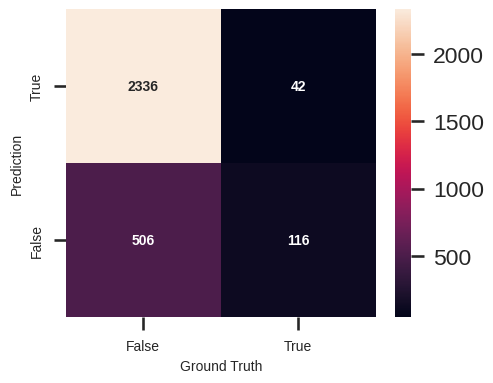

In [311]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)

## 2. (c) Decision Tree

In [312]:
rs=1

In [313]:
DTC = DecisionTreeClassifier(random_state=rs)

In [314]:
#For this a `params_grid_dtc` dictionary which contains the parameter candidates are defined.
params_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

In [315]:
grid_search_dtc = GridSearchCV(estimator = DTC, 
                        param_grid = params_grid_dtc, 
                        scoring='accuracy',
                        cv = 5, verbose = 1)
grid_search_dtc.fit(X_train, y_train)
best_params_dtc = grid_search_dtc.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [316]:
best_params_dtc

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}

In [317]:
y_pred_dec = grid_search_dtc.best_estimator_.predict(X_test)

In [318]:
evaluate_metrics(y_test, y_pred_dec)

,0
precision,"[0.8689577039274925, 0.78125]"
recall,"[0.9676198486122792, 0.44212218649517687]"
fscore,"[0.9156386788698766, 0.5646817248459959]"
accuracy,0.858667


### Confusion Matrix

Text(0.5, -4.777777777777784, 'Ground Truth')

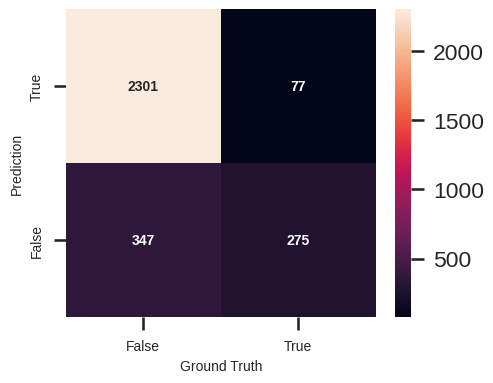

In [319]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_dec), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)

## 2. (d) Random Forest

In [320]:
rfc = RandomForestClassifier()

In [321]:
params_grid_rfc = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [322]:
grid_search_rfc = GridSearchCV(estimator=rfc,
                               param_grid=params_grid_rfc,scoring='accuracy')
grid_search_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [323]:
grid_search_rfc.best_params_

{'max_depth': 11, 'max_features': 'sqrt', 'n_estimators': 39}

In [324]:
y_pred_rfc = grid_search_rfc.best_estimator_.predict(X_test)

In [325]:
evaluate_metrics(y_test, y_pred_rfc)

,0
precision,"[0.8747161241483724, 0.8128491620111732]"
recall,"[0.971825063078217, 0.4678456591639871]"
fscore,"[0.9207171314741035, 0.5938775510204082]"
accuracy,0.867333


### Confusion Matrix

Text(0.5, -4.777777777777784, 'Ground Truth')

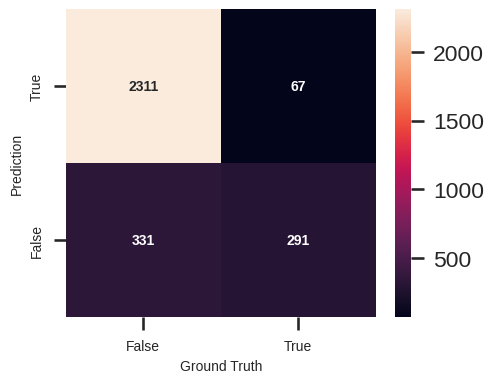

In [326]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)

## 2. (e) Stacking Models

As a final test stacking different models are tried via `StackingClassifier`. The models stacked are `Support Vector Machine`, `K Nearest Neighbor`, `Decision Tree Classifier`, and a `Logistic Regression`.

In [327]:
stack_estimators = [('SVM_stack',SVC(random_state=rs)),
                    ('KNN_stack',KNeighborsClassifier()),
                    ('DTC_stack',DecisionTreeClassifier())]
stack_estimators

[('SVM_stack', SVC(random_state=1)),
 ('KNN_stack', KNeighborsClassifier()),
 ('DTC_stack', DecisionTreeClassifier())]

In [328]:
stack_clf = StackingClassifier( estimators=stack_estimators, final_estimator= LogisticRegression())
stack_clf.fit(X_train, y_train)
stack_clf

StackingClassifier(estimators=[('SVM_stack', SVC(random_state=1)),
                               ('KNN_stack', KNeighborsClassifier()),
                               ('DTC_stack', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [329]:
y_pred_stack = stack_clf.predict(X_test)

In [330]:
evaluate_metrics(y_test, y_pred_stack)

,0
precision,"[0.8749524895477004, 0.7940379403794038]"
recall,"[0.968040370058873, 0.47106109324758844]"
fscore,"[0.9191455380315432, 0.5913218970736629]"
accuracy,0.865


### Confusion Matrix

Text(0.5, -4.777777777777784, 'Ground Truth')

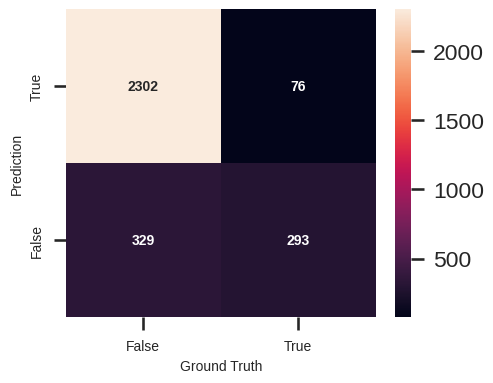

In [331]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)

## 3. Permutation Feature Importance

For the stacking classifier model, the importance of the features are calculated using Permutation Feature Importance method and the boxplot of it is shown here.

In [332]:
X_train_col = pd.DataFrame(X_train, columns = X_col.columns)

In [333]:
X_train_col

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.098592,-0.564665,-1.041760,1.117213,0.807737,0.646092,0.970243,-0.770218,-1.432445,-1.325795,0.997204,-0.578736,-0.573809,-0.912419,0.912419,1.728824,-0.577658,-0.576580,-0.576734
1,-1.133270,0.007457,0.687130,-1.225848,0.807737,0.646092,-1.030670,-1.395767,1.412812,0.772353,0.997204,-0.578736,-0.573809,-0.912419,0.912419,-0.578428,-0.577658,1.734363,-0.576734
2,-0.626278,3.535540,-0.004426,1.354191,-0.911583,-1.547768,0.970243,-1.499656,0.701498,1.405338,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-0.578428,-0.577658,1.734363,-0.576734
3,-1.391939,1.056346,-0.004426,-1.225848,-0.911583,-1.547768,0.970243,0.800862,1.412812,-0.431648,-1.002804,-0.578736,1.742740,-0.912419,0.912419,-0.578428,1.731128,-0.576580,-0.576734
4,-1.474714,2.009882,0.687130,1.070229,-0.911583,0.646092,0.970243,0.512497,-0.009816,0.533323,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-0.578428,1.731128,-0.576580,-0.576734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.584891,-0.660018,-0.350204,0.698607,0.807737,0.646092,0.970243,1.093273,-0.721130,0.537750,-1.002804,1.727904,-0.573809,1.095988,-1.095988,1.728824,-0.577658,-0.576580,-0.576734
6996,1.484464,-1.613554,-0.350204,0.608299,-0.911583,0.646092,0.970243,0.133249,0.701498,-1.684339,-1.002804,-0.578736,1.742740,1.095988,-1.095988,-0.578428,-0.577658,-0.576580,1.733900
6997,0.905045,-0.373958,-0.004426,1.358909,0.807737,0.646092,-1.030670,1.414415,1.412812,-0.179339,0.997204,-0.578736,-0.573809,-0.912419,0.912419,-0.578428,-0.577658,-0.576580,1.733900
6998,-0.626278,-0.087897,1.378686,-1.225848,0.807737,0.646092,0.970243,0.846147,-0.009816,-0.139501,-1.002804,-0.578736,1.742740,1.095988,-1.095988,-0.578428,-0.577658,-0.576580,1.733900


In [340]:
# Use permutation_importance to calculate permutation feature importances
feature_importances = permutation_importance(estimator=stack_clf, X = X_train, y = y_train, n_repeats=5,
                                random_state=123, n_jobs=2)

In [393]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots(figsize=(10,8))
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, labels=X_train_col.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    plt.show()

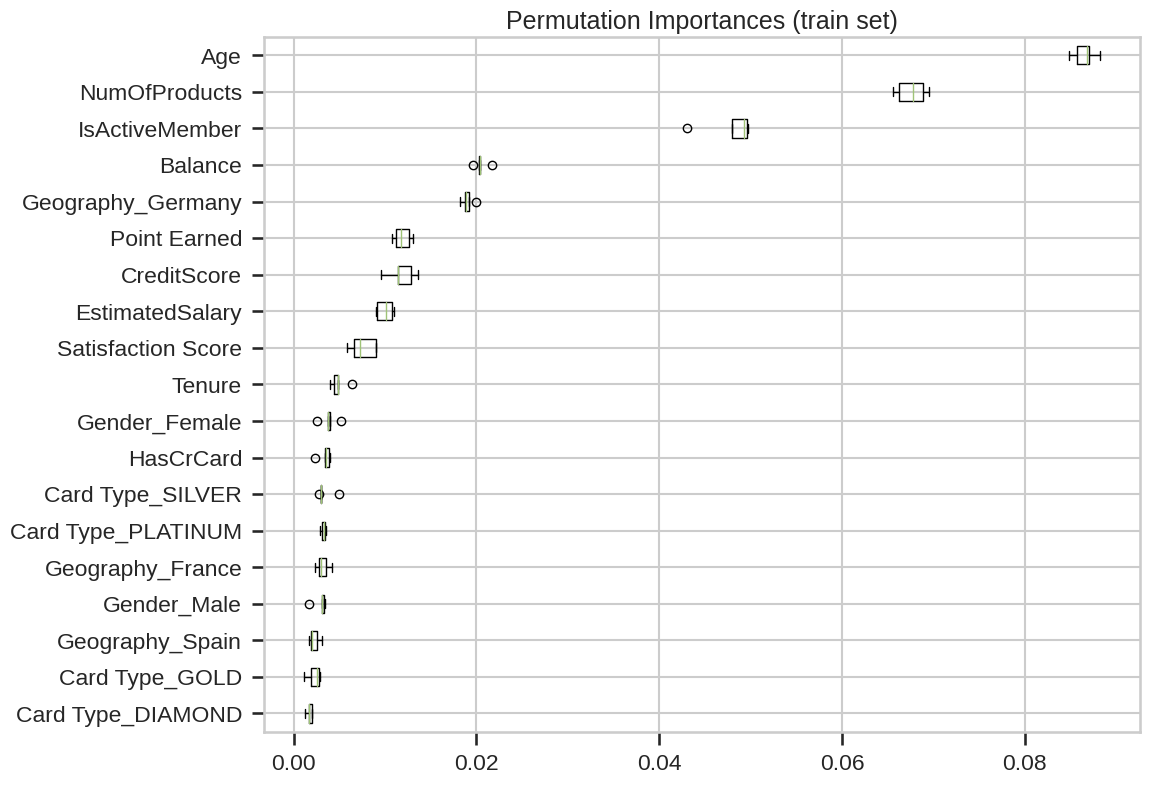

In [394]:
visualize_feature_importance(feature_importances)

## The`Age`, `No. of Products` and `IsActiveMember` are the most important features, and higher these features are the less likely the customer is to churn

# 4. Conclusion

We studied the dataset and plotted the Categorical and Continous variables separately. 

From our EDA, we see that there is absolute correlation between the 'Complain' variable and our target variable 'Exit', thus we exclude the 'Complain' variable. 

We used the OneHotLabel Encoder to transform our categorical variables into continuous variables and used the StandardScaler to put our data in the same scale.

In our Model predictions, we see that the `Random Forest` and `Stacking models` provided the best results with accuracy `~86%`.

From the Feature Importance study, we saw that the variables - Age, NumOfProducts and Balance have the most importance, which was also reflected in our EDA plots.